In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx
import matplotlib.pyplot as plt

import os
# import pandas_profiling
datapath = 'C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\dataset_2022'

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

Reference: https://www.kaggle.com/code/usui113yst/basic-network-analysis-tutorial/notebook
## Load Graph and Basic Information

In [2]:
G = nx.read_graphml(os.path.join(datapath, 'manhatten.graphml'))
nx.info(G)

C:\Users\luoyan011\AppData\Local\Temp\ipykernel_13940\682672548.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


"MultiDiGraph named 'Manhattan, New York, USA' with 4426 nodes and 9626 edges"

The graph has 4426 nodes and 9626 edges so the size of the network is 4426 and it states that it is an MultiDIGraph, which means the edges of the graph are directed, so they point to a specific node in the network.

To mention here is that just like for the degree, some graph porperties are defined on either directed or undirected some can be translated to both, so in order to calculate some measurements we provide also an undirected graph for the Manhattan network simply by calling the build in graph function from networkx. A graph is often called simple graph, if it contains no self-loops and directed edges.

In [3]:
G_simple = nx.Graph(G)
nx.info(G_simple)

C:\Users\luoyan011\AppData\Local\Temp\ipykernel_13940\414732325.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_simple)


"Graph named 'Manhattan, New York, USA' with 4426 nodes and 7886 edges"

The number of nodes is still 4426 but the number of edges is decreased to only 788 edges. Also the degree went up to 3.56. 

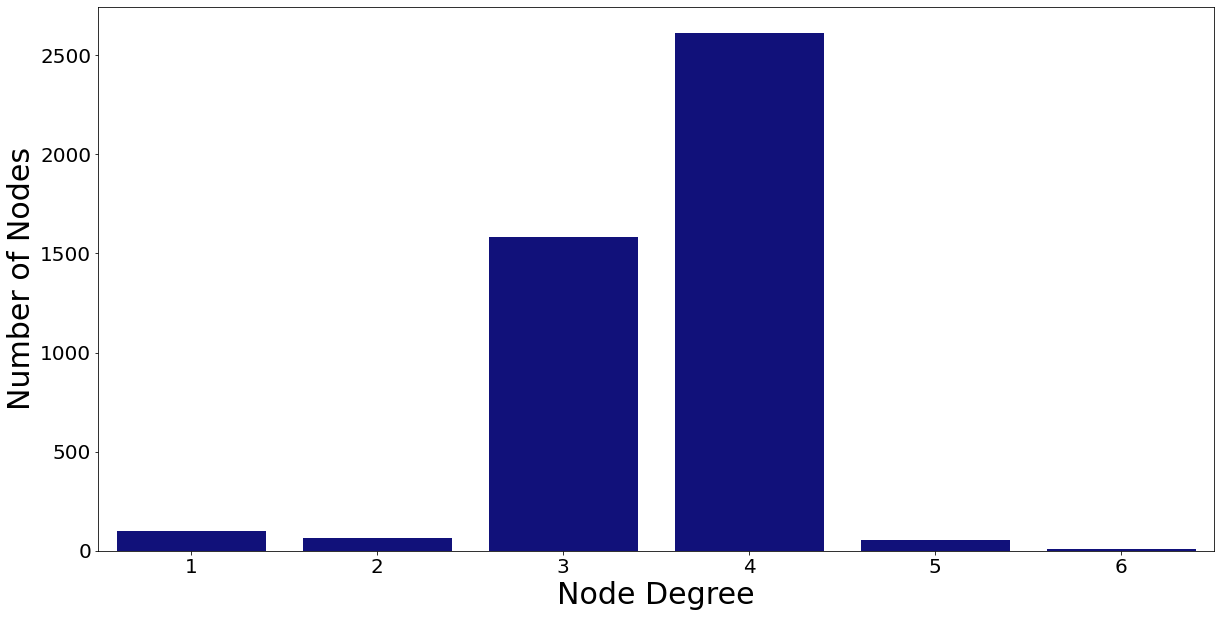

In [5]:
from collections import Counter
import seaborn as sns

degree = [ v for _, v in nx.degree(G_simple) ]
degree_hist = pd.DataFrame({"degree": degree})

plt.figure(figsize=(20,10))
sns.countplot(x="degree", data=degree_hist, color = 'darkblue')
plt.xlabel('Node Degree', fontsize=30)
plt.ylabel('Number of Nodes', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

most of the nodes tend to have a degree of 3 or 4 which comes from the grid like structure of Manhattan. And this is confirmed by plotting the distributions for the directed case, most nodes with 2 outgoing edges have also two incoming edges!

C:\Users\luoyan011\.conda\envs\ox\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


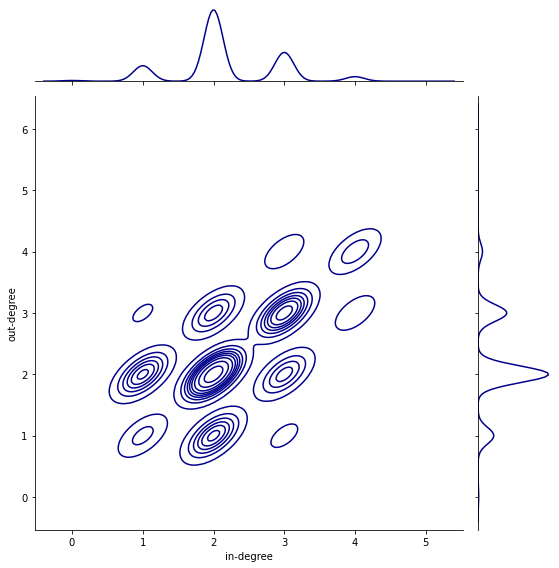

In [6]:
ins = [ v for _, v in G.in_degree() ]
outs = [ v for _, v in G.out_degree() ]
degrees = pd.DataFrame({"in-degree": ins, "out-degree": outs})

fig = sns.jointplot(x="in-degree",y="out-degree",data=degrees,kind="kde", color = 'darkblue',size=8)


A first measure of the structure of a network is the so called **density** which measure how many links from all possible links within the network are realized. The density is 0 if there are no edges, called **empty graph** and 1 if we have a **complete Graph**, all possible links between nodes are established.

In [32]:
nx.density(G)

0.000469499578519043

## Package osmnx and Graph Visualization

By using osmnx build-in function we can load graph directly.

C:\Users\luoyan011\.conda\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


9885
8125


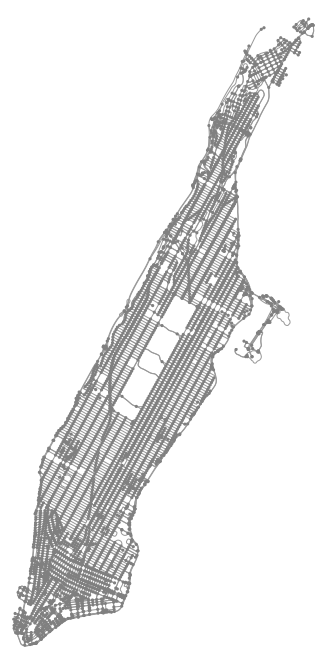

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

In [2]:
import osmnx as ox
G = ox.graph_from_place('Manhattan, New York, USA', network_type='drive')

# how many edges are there?
print(len(G.edges))  # 9885

# how many edges have a geometry attribute?
print(sum(['geometry' in d for u, v, d in G.edges(data=True)]))  # 8125

# this works fine, without errors
ox.plot_graph(G, figsize = (12, 12), node_size=10, node_zorder=2, bgcolor ='#FFFFFF' ,node_color = '#808080')

In [5]:
G[list(G.nodes())[0]]

AdjacencyView({42432736: {0: {'osmid': 195743153, 'name': 'Central Park West', 'highway': 'secondary', 'maxspeed': '25 mph', 'oneway': False, 'length': 86.25800000000001, 'geometry': <shapely.geometry.linestring.LineString object at 0x00000226075AB070>}}, 42435337: {0: {'osmid': 195743153, 'name': 'Central Park West', 'highway': 'secondary', 'maxspeed': '25 mph', 'oneway': False, 'length': 85.34200000000001, 'geometry': <shapely.geometry.linestring.LineString object at 0x00000226075AB0A0>}}, 42421731: {0: {'osmid': [420625565, 420625573, 5668966], 'name': 'West 106th Street', 'highway': 'secondary', 'oneway': False, 'length': 138.03300000000002, 'geometry': <shapely.geometry.linestring.LineString object at 0x00000226075AB130>}}})

## Network Properties

the longest shortest path in the network is called the diameter of the graph and gives us a feeling of how far things are seperated in the graph. We will compute the diameter on the simple graph for computation time.

In [6]:
nx.diameter(G_simple)

88

In [8]:
nx.average_shortest_path_length(G_simple)

35.046706033428556

plot the degree distributions as below:

C:\Users\luoyan011\AppData\Local\Temp\ipykernel_13940\3541367105.py:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sigma = sp.sqrt(mu)
C:\Users\luoyan011\AppData\Local\Temp\ipykernel_13940\3541367105.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,2*10**2])


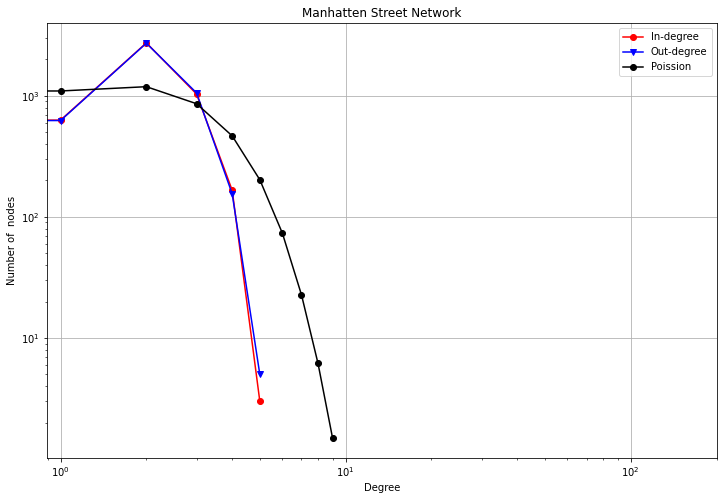

In [35]:
import scipy as sp
from scipy import stats

ins = [ v for _, v in G.in_degree() ]
outs = [ v for _, v in G.out_degree() ]
degrees = pd.DataFrame({"in_degree": ins, "out_degree": outs})
out_series = degrees.out_degree.value_counts().sort_index()
in_series = degrees.in_degree.value_counts().sort_index()

out_values =  out_series.keys()
out_hist = list(out_series)

in_values =  in_series.keys()
in_hist = list(in_series)

mu = 2.17
sigma = sp.sqrt(mu)
mu_plus_sigma = mu + sigma
x = range(0,10)
prob = stats.poisson.pmf(x, mu)*4426

plt.figure(figsize=(12, 8)) 
plt.grid(True)
plt.loglog(out_values,out_hist,'ro-')  # in-degree
plt.loglog(in_values,in_hist,'bv-')  # in-degree
plt.plot(x, prob, "o-", color="black")
plt.legend(['In-degree','Out-degree','Poission'])
plt.xlabel('Degree')
plt.ylabel('Number of  nodes')
plt.title('Manhatten Street Network')
plt.xlim([0,2*10**2])
plt.show()

If a graphs degree distribution follows the scale free property on a log-log scale plot like above, the data points should form approximately a straight line indicating the presents of hubs. In our figure in the cell above this is clearly not the case. As already plotted, the degree distributions follow a Poisson Distribution which is typical for a random network.

So what can we say about the Manhattan Street Network? It has more edges than nodes, and the fact that it is not scale-free means the absents of hub nodes and it follows a Poisson Distribution like random networks do.

Now we can ask the question, is it good for a road network that its degree distribution does not have the scale free property and is even random? How does this influences the robustness of the network in a sense that what happens if specific roads are closed, how does this influnces the traffic flow?

## Network Robustness

### Node Connectivity
The Node Connectivity describes the number of nodes we must delete from the Graph G until it is disconnected.

In [3]:
G_simple = nx.Graph(G)
# G_simple2 = nx.Graph(G)
nx.node_connectivity(G_simple)

1

In [4]:
nx.node_connectivity(G, 42448238, 42423296)


2

In [ ]:
for path in nx.all_simple_paths(G, source=42448238, target=[42423296]):
    print(path)

As aspected the output of the node connectivity function is 1, meaning our graph is disconnected after removing just 1 node. But does this matter? No, because the size of the removed subgraph is just a single node and the rest of the network is still connected. If however the size of the resulting disconnected part is relatively big, this indicates a problem in the structure of the network.
### Algebraic Connectivity
Basically our network is nothing else as a matrix containing 1's if two nodes are connected to each other. Graphs can be differently defined as matrices and one of these matrices is the so called Laplacian matrix, which has special properties in the eigenspace. Its eigenvalues are non negative and if ordered the smallest one eigenvalue is zero. The second smallest eigenvalue of the Laplacian matrix is called the algebraic connectivity or the Fiedler value. It is directly indicater for the robustness of the network have the properties that:

The algebraic connectivity is equal to zero if and only if the graph is disconnected.
The algebraic connectivity of an graph is not greater than the node connectivity.

In [37]:
nx.algebraic_connectivity(G_simple)

<class 'networkx.utils.decorators.argmap'> compilation 30:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


0.0004464245093417163

According to its properties we can say, that the graph is connected because the algebraic connectivity is 0.00034 and < node connectivity.

### Betweenness Centrality
Betweenness Centrality can be measure for nodes or edges and it defines the fraction of all shortest paths in the network passing through the edge/ node for which it is calculated.

Roads with a very high betweenness centrality lie on many shortest paths in the network and should be considered to be important roads in the network which may have increased traffic volume.

In [13]:
G_simple = nx.Graph(G)
between =  nx.betweenness_centrality(G_simple)

In the cell above we created two simple graphs and calculated the betweeness-centrality for each node in the network. We can now tell which nodes in the network play an important role as they are traversed more often. Let's find out which is on the most shortest path in the network:

In [49]:
between.items()

dict_items([(42421728, 0.0007043323573004305), (42421731, 0.002499924112561433), (42421737, 0.00920308762943697), (42421741, 0.0026272825120438412), (42421745, 0.0007423211732358609), (42421749, 0.0004430399305224874), (42421751, 0.00020608157457053763), (42421769, 0.0033779917800895705), (42421772, 0.0054780975420822805), (42421775, 0.007572696246981875), (42421776, 0.0077968365399725716), (42421778, 0.007497949646325865), (42421783, 0.0009341624996705154), (42421785, 0.00022435087924534909), (42421786, 0.0009252208041075774), (42421791, 0.0031483151072478287), (42421800, 0.001727889337151364), (42421803, 0.0016277719013292227), (42421806, 0.0015422839107486538), (42421809, 0.0011005472766987465), (42421810, 0.0008021330743957496), (42421820, 0.0005006539015816026), (42421828, 0.0002199415942912922), (42421852, 0.00688848074750349), (42421857, 0.008284695537420943), (42421865, 0.009389876122659424), (42421877, 0.007531121453950805), (42421889, 0.006629388742979461), (42421941, 0.00509

In [44]:
G_projected = ox.project_graph(G)
max_node, max_bc = max(between.items(), key=lambda x: x[1])
max_node, max_bc

(371188756, 0.34620772515886816)

In Manhatten the node with ID 371188756 has the highest betweenness centrality and 34.6% of all shortest paths running through it. This needs to be plotted!

In [47]:
G[371188756]

AdjacencyView({371207282: {0: {'osmid': [455688835, 32959885, 489022288, 489022289, 989159058, 32959795, 910349558, 32959993, 32959995, 455688829, 455688831], 'oneway': True, 'lanes': '3', 'name': 'FDR Drive', 'highway': 'motorway', 'length': 2614.6, 'tunnel': ['yes', 'building_passage'], 'maxspeed': '40 mph', 'geometry': <shapely.geometry.linestring.LineString object at 0x000002260C42CB20>}}})

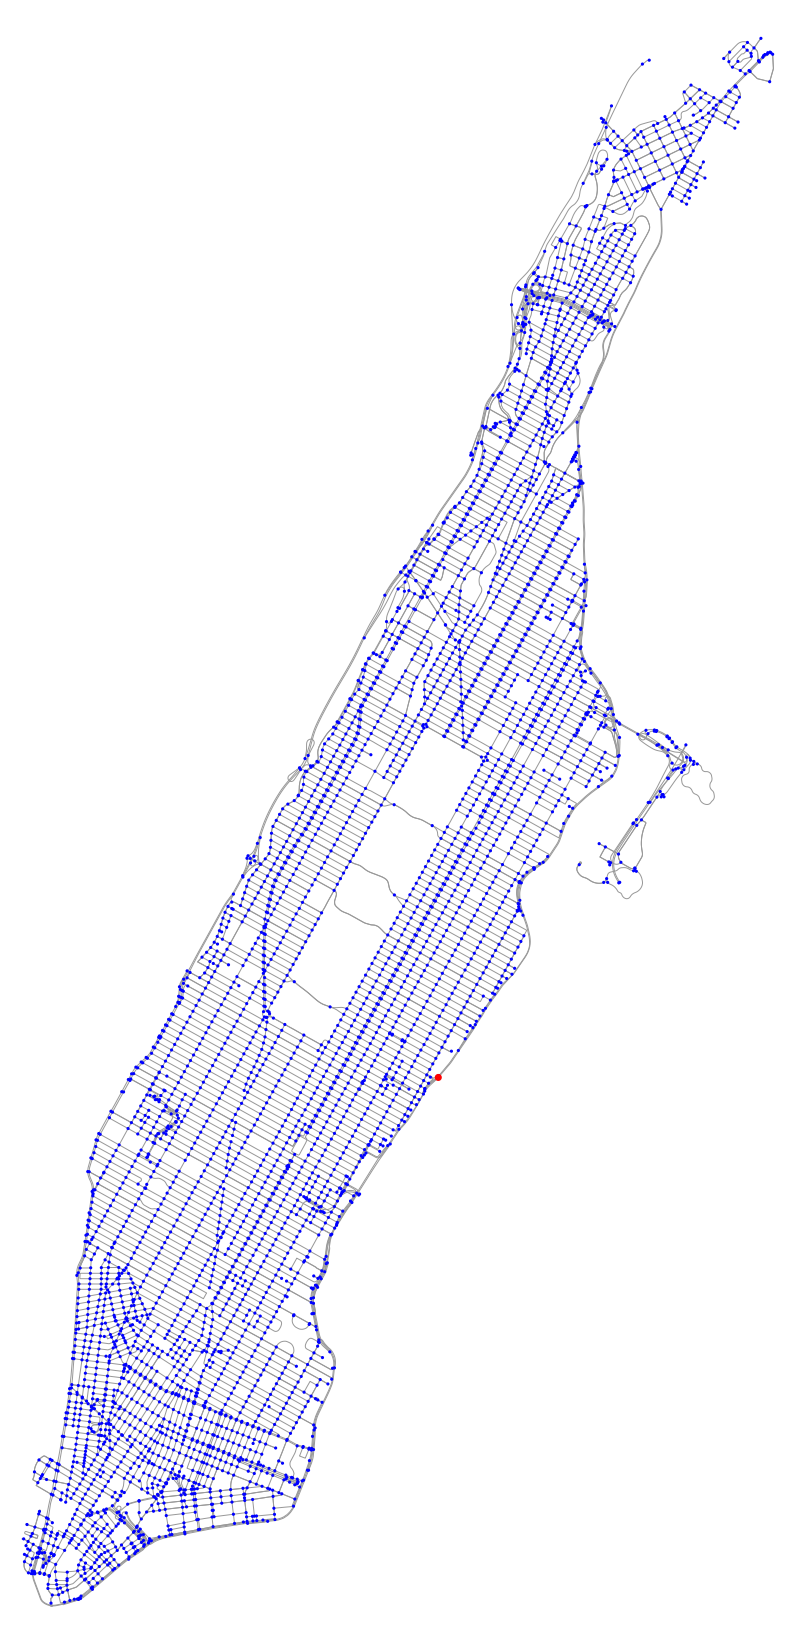

(<Figure size 2160x2160 with 1 Axes>, <AxesSubplot:>)

In [67]:
nc = ['r' if (u==371188756) else 'b' for u in G.nodes()]
ns = [50 if (u==371188756) else 10 for u in G.nodes()]
ox.plot_graph(G, figsize = (30, 30), node_size=ns, bgcolor ='#FFFFFF', 
              node_zorder=2, node_color=nc)


### Network Attacks
Now we know some basic robustness measurements, so it is time to see how robust is our network really? For this we will attack the networks nodes with two approaches:

* Delete nodes according to the calculated betweenness centrality, going from high scoring nodes to low scoring ones
* Random node failures, deleting nodes by random

Deleting nodes will have the effect that the **giant component**, the largest connected component in the graph, will shrink and some nodes might have a specific role in this process which cause a drastic shrinkage of the giant component.

In [78]:
list(G_simple.subgraph(c) for c in nx.connected_components(G_simple))[0]

ERROR! Session/line number was not unique in database. History logging moved to new session 724


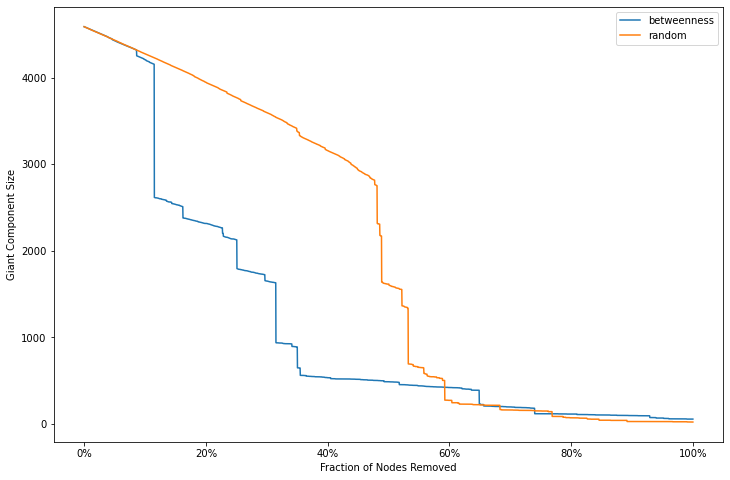

In [84]:
import operator
from random import shuffle
from random import randrange
from random import randint
import random
import matplotlib.ticker as mtick

from networkx import connected_components
G_simple = nx.Graph(G)
G_simple2 = nx.Graph(G)

sorted_x = sorted(between.items(), key=operator.itemgetter(1), reverse=True)
rand_x = list(range(0,4426 ))

random.shuffle(rand_x)
between_giant = []
between_rand = []
avg_degs = []

for x in range(3000):
 
        remove = sorted_x[x]      
        remove2 = sorted_x[rand_x[x]]
        G_simple.remove_nodes_from(remove)
        G_simple2.remove_nodes_from(remove2)
             
        connected_component_subgraphs1 = (G_simple.subgraph(c) for c in nx.connected_components(G_simple))
        connected_component_subgraphs2 = (G_simple2.subgraph(c) for c in nx.connected_components(G_simple2))

        giant = len(max(connected_component_subgraphs1, key=len))
        giant2 = len(max(connected_component_subgraphs2, key=len))

        between_giant.append(giant)
        between_rand.append(giant2)

y1 = between_giant
y2 = between_giant

y1= y1[ :-1]
y2= y2[1: ]

perc = np.linspace(0,100,len(between_giant))
fig = plt.figure(1, (12,8))
ax = fig.add_subplot(1,1,1)

ax.plot(perc, between_giant)
ax.plot(perc, between_rand)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.set_xlabel('Fraction of Nodes Removed')
ax.set_ylabel('Giant Component Size')
ax.legend(['betweenness','random'])
plt.show()

## Newyork Texi Data

In [2]:
newyork_texi = pd.read_csv(os.path.join(datapath,'newyork_texi_train.csv'))
newyork_texi.sort_values('trip_duration', ascending=False).head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612


In [3]:
def get_shortest_path(data, tripID):
    trip = data[data.id==tripID]
    
    pick_node = ox.distance.nearest_nodes(G, trip.pickup_longitude, trip.pickup_latitude)
    drop_node = ox.distance.nearest_nodes(G, trip.dropoff_longitude, trip.dropoff_latitude)
    
    try:
        route = nx.shortest_path(G, pick_node[0], drop_node[0])
        #plot the shortest path on the graph
        fig, ax = ox.plot_graph_route(G, route, figsize = (20, 15), node_size=10, bgcolor ='#FFFFFF', 
              node_zorder=2, node_color='b')
        print("Shortest Path:")
        print(route)
        
    except:
        print("Some Error")
        #handle error
        pass
    
    #the corresponding node betweenness scores for each edge in the shortest path
    print("Betweenness Centrality for each node on the path")
    node_bet = []
    for edge in route:
        node_bet.append(between[edge])
    print(node_bet)
    

In [11]:
newyork_texi[24:25]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.78875,40.641472,N,2485


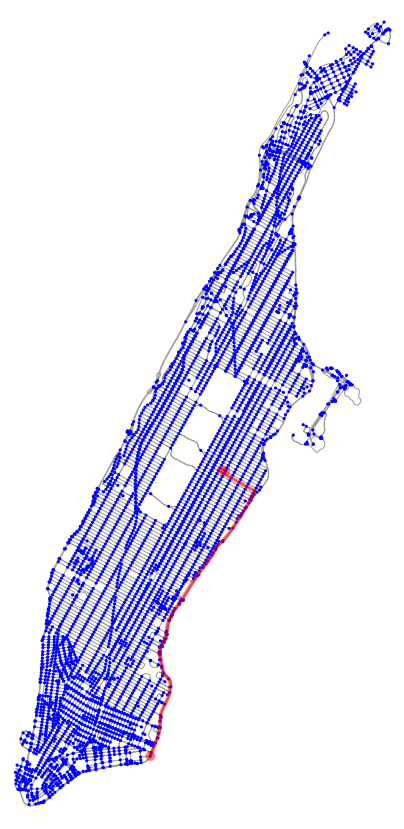

Shortest Path:
[42448238, 42447126, 42439399, 42439403, 42439406, 42439409, 42428027, 42439416, 42451754, 42438513, 42451744, 42450641, 42424142, 42424145, 42438809, 42450634, 371188320, 406006393, 5426969134, 370924677, 5779545445, 370912817, 42423774, 42426865, 370898427, 42423549, 42423039, 42450820, 42423296]
Betweenness Centrality for each node on the path
[0.0011453724697968596, 0.0012608658479039895, 0.001812485624504952, 0.001761073159231235, 0.0016510170883077973, 0.0014817969207083386, 0.0014178995244629594, 0.0023237892567221116, 0.0036956285501748773, 0.005823899350124096, 0.010838815551702146, 0.01115641002293096, 0.04123371725543487, 0.06652585842738822, 0.05462706889892705, 0.06623819519669785, 0.07272736758465784, 0.08004580523735644, 0.09203894004745333, 0.0848224379642329, 0.0813209387657197, 0.07594573254071003, 0.08254880620046136, 0.08219245771739661, 0.07689140215237969, 0.062349929775497255, 0.025126658744362193, 0.023685498537447114, 0.014889426913542623]


In [21]:
sampleid = newyork_texi.sample(1)['id'].values[0]
get_shortest_path(newyork_texi, 'id3321406')

### Try New-York Map

In [4]:
import osmnx as ox
G = ox.graph_from_place('New York, USA', network_type='drive')
G_simple = nx.Graph(G)
between =  nx.betweenness_centrality(G_simple)

C:\Users\luoyan011\.conda\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [8]:
import json

# create json object from dictionary
json = json.dumps(between)
f = open(os.path.join(datapath, "newyork_betweeness.json"),"w")
f.write(json)
f.close()

In [5]:
newyork_texi[24:25]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.78875,40.641472,N,2485


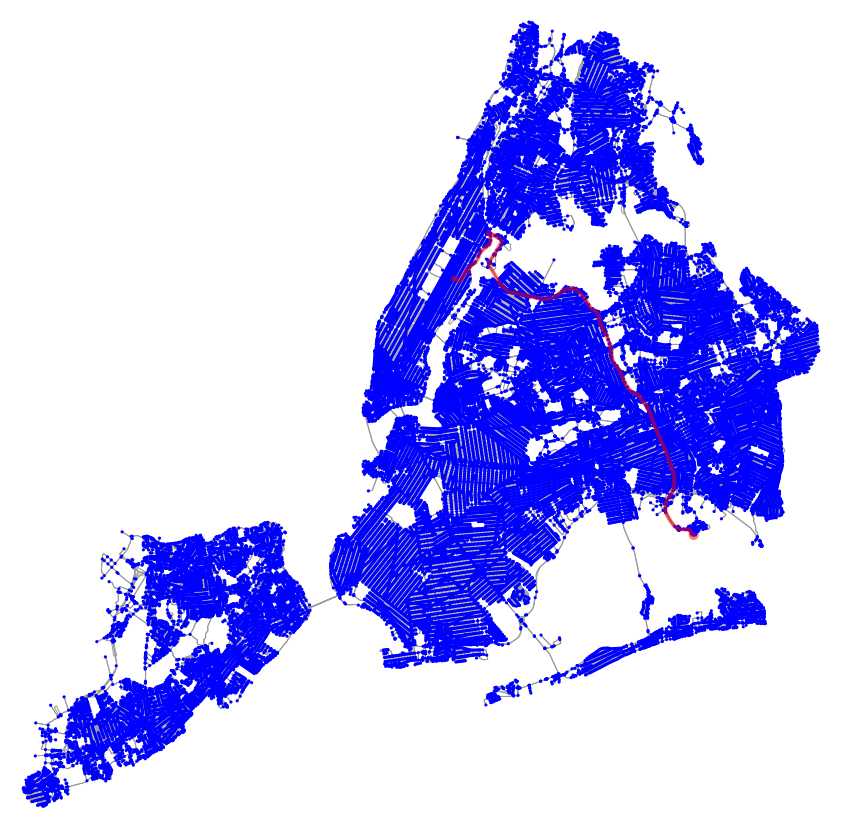

Shortest Path:
[42448238, 42435514, 42435516, 42435518, 42456066, 42429342, 42454196, 42445748, 42436551, 42444820, 42456076, 42448745, 42452814, 589929417, 6289180298, 42424025, 371209940, 371239958, 42422449, 371225132, 277481436, 277481521, 42449515, 1934650086, 3778245570, 276209383, 106076455, 106074504, 6177010804, 106138510, 484800839, 2408421436, 484801030, 599270566, 274421431, 42792957, 106599704, 6202834872, 106602276, 106666428, 276096342, 42830578, 277578666, 277578452, 280638390, 280638530, 3915754594, 9301990250, 1934649890, 457015393, 457018716, 457015642, 457016299, 457016298, 277788912, 277782183, 277782181, 1934649861, 42805006, 42804178, 457192004, 599140012, 599140020, 277783830, 599140064, 277782923, 599025483, 599025355, 599025358, 599029194, 599029195, 599029203]
Betweenness Centrality for each node on the path
[3.8792542855212514e-05, 4.043601064766408e-05, 2.9801716364596235e-05, 1.87525185760316e-05, 5.726367515677141e-05, 0.00011462691650154687, 0.0001912188

In [6]:
sampleid = newyork_texi[24:25]['id'].values[0]
get_shortest_path(newyork_texi, 'id3321406')